In [3]:
using Plots
using Random
using LinearAlgebra


In [4]:
# Function to generate meshgrid (since Julia's meshgrid works differently)
function meshgrid(x, y)
    return repeat(x', length(y), 1), repeat(y, 1, length(x))
end

meshgrid (generic function with 1 method)

In [15]:

# Setting the seed for reproducibility
Random.seed!(37)

n = 61^2; D = 2
x1, x2 = meshgrid(-3:0.1:3, -3:0.1:3)
x = [x1[:] x2[:]]


# First figure
Q = zeros(n, n)
for d in 1:D
    Q += (repeat(x[:,d], 1, n) - repeat(x[:,d]', n, 1)).^2
end
Q = exp.(-0.5 .* Q)
# Corrected reshape usage
y = cholesky(Q + 1e-9 * I).L' * randn(n, 1)
p1 = surface(-3:0.1:3, -3:0.1:3
    , reshape(y, 61, 61), xlabel="input x1", ylabel="input x2", zlabel="output y"
)
p1 = plot!(
    aspect_ratio=:equal, xlims=(-3,3), ylims=(-3,3), zlims=(-2,2)
);

In [21]:
# Second figure
Random.seed!(34)
Q = zeros(n, n)
L1 = 1; L2 = 5
Q += (repeat(x[:,1], 1, n) - repeat(x[:,1]', n, 1)).^2 / (L1^2)
Q += (repeat(x[:,2], 1, n) - repeat(x[:,2]', n, 1)).^2 / (L2^2)
Q = exp.(-0.5 .* Q)
y = cholesky(Q + 1e-9 * I).L' * randn(n, 1)
p2 = surface(-3:0.1:3, -3:0.1:3)
p2 = plot!(
    aspect_ratio=:equal, xlims=(-3,3), ylims=(-3,3), zlims=(-2,2)
);

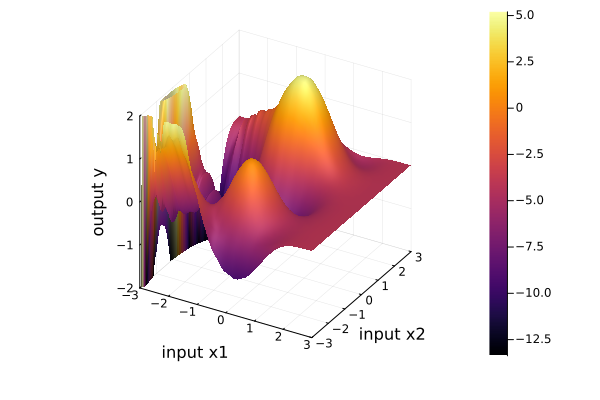

attempt to save state beyond implementation limit


In [23]:
plot(p1)

# References

- [ ] [gprDemoArd.m](https://github.com/probml/pmtk3/blob/master/demos/gprDemoArd.m)